In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat
from math import sqrt

In [29]:
df = pd.read_csv('housing.csv')
df.shape[0]

20640

In [30]:
df = df[df['median_house_value'] > 0]
df.shape[0]

20640

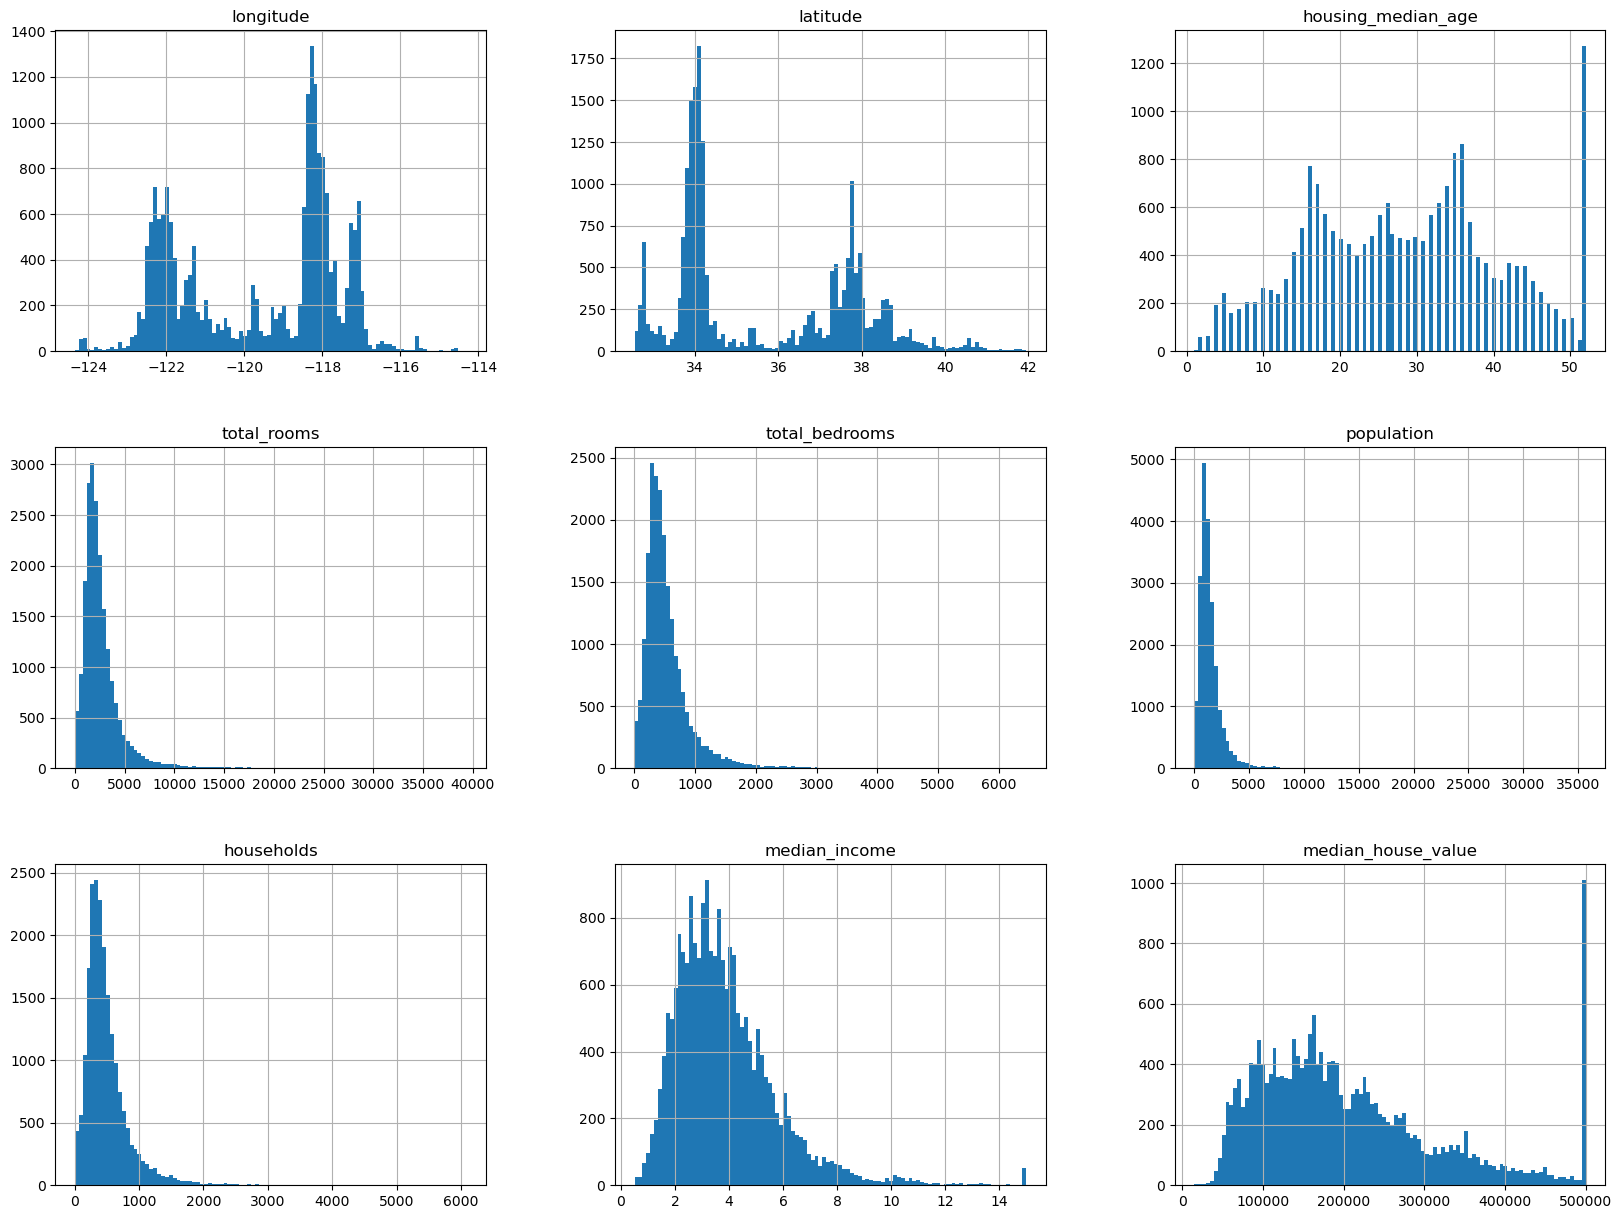

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=100, figsize=(20,15))
plt.show()

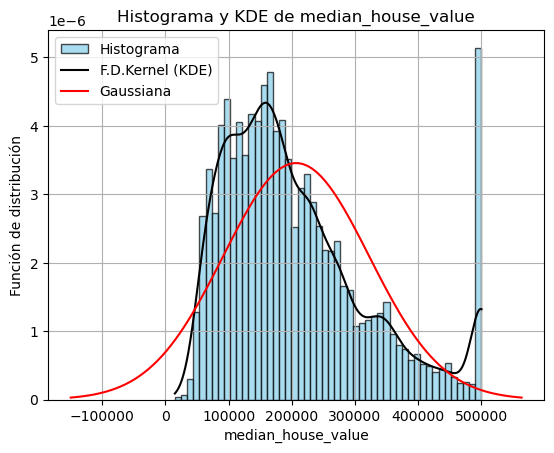

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import norm


# Datos de ejemplo (edad media de los edificios)
edades_edificios = df['median_house_value']

# Crear la función de densidad kernel (KDE)
kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='black', label='F.D.Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df['median_house_value']), scale=np.std(df['median_house_value']))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="Gaussiana")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

Text(0.5, 0, 'median_house_value')

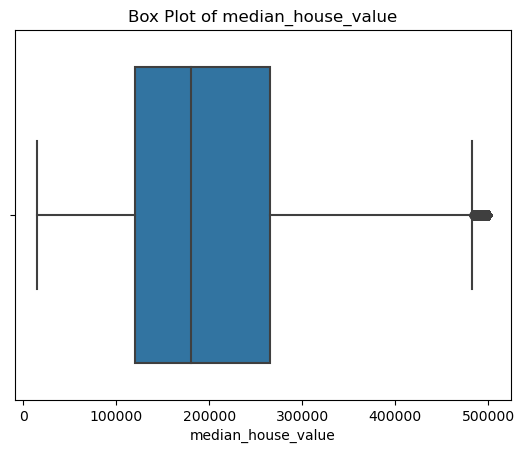

In [33]:
# Create a box plot
g = sns.boxplot(data = df, x = 'median_house_value')

# Add a title and change xlabel
g.set_title('Box Plot of median_house_value')
g.set_xlabel('median_house_value')

La prueba de Shapiro se utiliza para verificar si un conjunto de datos proviene de una población con una distribución normal.

Hipótesis nula (H0): Los datos provienen de una distribución normal.
Hipótesis alternativa (H1): Los datos no provienen de una distribución normal.
El estadístico de la prueba de Shapiro se calcula a partir de las desviaciones de los datos respecto a una distribución normal. Si los datos se ajustan bien a una distribución normal, el estadístico de la prueba será cercano a 1. Si los datos se desvían significativamente de una distribución normal, el valor del estadístico de la prueba será menor.

El valor p asociado con el estadístico de la prueba indica la probabilidad de obtener un valor del estadístico de prueba al menos tan extremo como el observado, si la hipótesis nula (los datos provienen de una distribución normal) es verdadera. Si el valor p es menor que un umbral predefinido (como 0.05), se rechaza la hipótesis nula y se concluye que los datos no provienen de una distribución normal.

Es importante considerar que la prueba de Shapiro tiene limitaciones, especialmente con muestras grandes, donde el valor p puede no ser preciso. Además, la interpretación de los resultados debe realizarse con precaución y tener en cuenta otros factores y análisis adicionales.

In [51]:
from scipy import stats
res = stats.shapiro(df['median_house_value'])
res.statistic

D:\Program Files (x86)\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9123021364212036

Dado que el tamaño de muestra en tu caso parece ser mayor a 5000, el valor p calculado podría no ser del todo preciso. Sin embargo, dado que el valor p obtenido es bastante alto (0.9123), parece indicar que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad. En otras palabras, los datos podrían ser consistentes con una distribución normal.

Observamos que el lim_inf no se corresponde al de la figura. Esto se debe a que nuestra funcion de densidad no es simetrica
es decir, está sesgada. Además, como tiene una cola hacia la derecha, el sesgo es positivo y por tanto Me < Media y la 
distancia de Q3 a Q2 es mayor que la de Q1 a Q2, por tanto, cuando calculamos el lim_inf nos sale negativo

In [34]:
# Calculate the percentiles
Q75 = df['median_house_value'].quantile(0.75)
Q25 = df['median_house_value'].quantile(0.25)

# Obtain IQR
IQR = Q75 - Q25

# Upper and lower thresholds
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)

print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df['median_house_value'] < lim_inf) | (df['median_house_value'] > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

# Observamos que el lim_inf no se corresponde al de la figura. Esto se debe a que nuestra funcion de densidad no es simetrica
# es decir, está sesgada. Además, como tiene una cola hacia la derecha, el sesgo es positivo y por tanto Me < Media y la 
# distancia de Q3 a Q2 es mayor que la de Q1 a Q2, por tanto, cuando calculamos el lim_inf nos sale negativo

IQR:  145125.0 
Q75:  264725.0 
Q25:  119600.0 
lim_inf:  -98087.5 
lim_sup:  482412.5
Number of outliers: 1071


In [35]:
#coeficiente de asimetría de Fisher-Pearson 
df['median_house_value'].skew()

0.9777632739098341

Como el coeficiente de asimetría de Fisher-Pearson sale positivo, se trata de una distribución asimétrica a derechas

In [36]:
#coeficiente de curtosis
df['median_house_value'].kurt()

0.3278702429465872

Como el coeficiente de curtosis es menor que 3 la distribución es Platicúrtica, distribución con colas menos largas que la normal

La Normalización Logarítmica se puede aplicar en diversas situaciones, como: 
Variables con distribuciones asimétricas: Si una variable tiene una distribución 
asimétrica o sesgada hacia la derecha, donde la mayoría de los valores se encuentran en el extremo inferior 
y hay algunos valores atípicos en el extremo superior, la Normalización Logarítmica puede ayudar a mejorar 
la simetría y acercar la distribución a una distribución normal.

Para aplicar correctamente la Normalización Logarítmica, los datos deben cumplir con los siguientes requisitos:
Valores positivos: La Transformación Logarítmica se aplica a variables con valores estrictamente positivos. No es 
adecuada para variables que incluyen valores negativos o cero.
Variables con sesgo positivo: La Normalización Logarítmica es más efectiva en variables con distribuciones 
asimétricas o sesgadas hacia la derecha, donde la mayoría de los valores se encuentran en el extremo inferior 
y hay algunos valores atípicos en el extremo superior

Al aplicar la Transformación Logarítmica, tomamos el logaritmo natural de los valores de las variables. 
Esto ayuda a comprimir los valores más grandes y expandir los valores más pequeños, mejorando así la simetría 
y facilitando el análisis estadístico o modelado que asume una distribución normal, pero no estándar.

In [37]:
print('Media ->', df['median_house_value'].mean(), 'Desv ->', df['median_house_value'].std())
df_log = np.log(df['median_house_value'])
print('Media ->', df_log.mean(), 'Des ->', df_log.std())

Media -> 206855.81690891474 Desv -> 115395.6158744132
Media -> 12.084884185522181 Des -> 0.5691344984955695


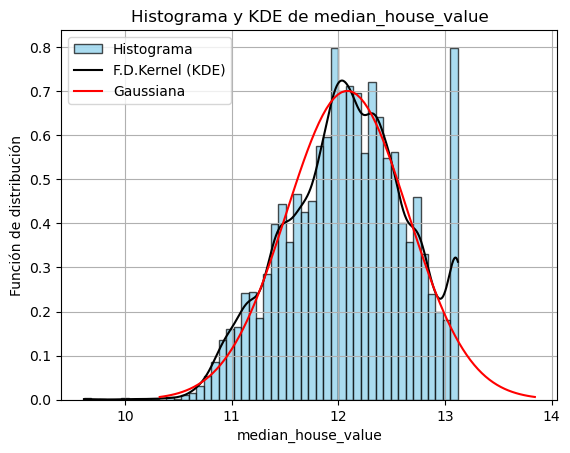

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [38]:
# Crear la función de densidad kernel (KDE)
edades_edificios = df_log

kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='black', label='F.D.Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df_log), scale=np.std(df_log))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="Gaussiana")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

{'whiskers': [<matplotlib.lines.Line2D at 0x2cec0212130>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec0212d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce803967c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec06078b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec0607580>],
 'means': []}

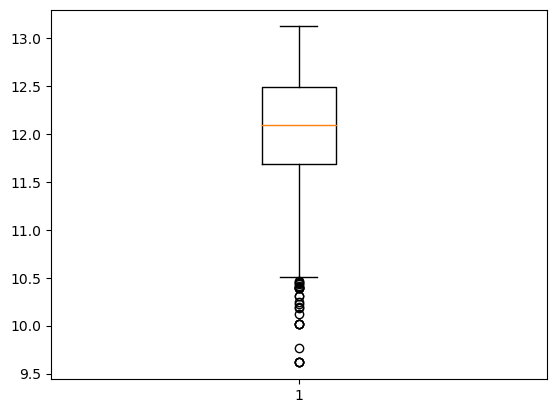

In [39]:
# Create a box plot
plt.boxplot(df_log)

In [40]:
# Calculate the percentiles
Q75 = df_log.quantile(0.75)
Q25 = df_log.quantile(0.25)

# Obtain IQR
IQR = Q75 - Q25

# Upper and lower thresholds
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)

print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df_log < lim_inf) | (df_log > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

IQR:  0.7945386964239738 
Q75:  12.486446816922642 
Q25:  11.691908120498669 
lim_inf:  10.500100075862708 
lim_sup:  13.678254861558603
Number of outliers: 26


Estandarizar una variable es transformarla de manera que, en lugar de ver los valores reales, vemos que van de 1 a -1, siendo 0 la media, y 1 y -1 los valores que corresponderia a sumar o resta a la media la máxima desviacion típica (que no necesariamente son los valores máximos y mínimos).
La estandarización más habitual consiste en convertir cada valor en su puntuación típica, es decir, restarle el valor medio y dividirlo por su desviación típica

In [41]:
print('Media ->', df['median_house_value'].mean(), 'Desv ->', df['median_house_value'].std())

#Normalizamos los valor con una distribución estándar
from sklearn.preprocessing import StandardScaler

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Extrae la columna 'median_house_value' y conviértela en un array 2D
data_2d = df['median_house_value'].values.reshape(-1, 1)

# Aplica el escalado a los datos
df_z = scaler.fit_transform(data_2d)

# Imprime la media y la desviación estándar de los datos normalizados
print('Media ->', df_z.mean(), 'Des ->', df_z.std())
df_z = df_z.flatten()

Media -> 206855.81690891474 Desv -> 115395.6158744132
Media -> -9.363741479009072e-17 Des -> 1.0


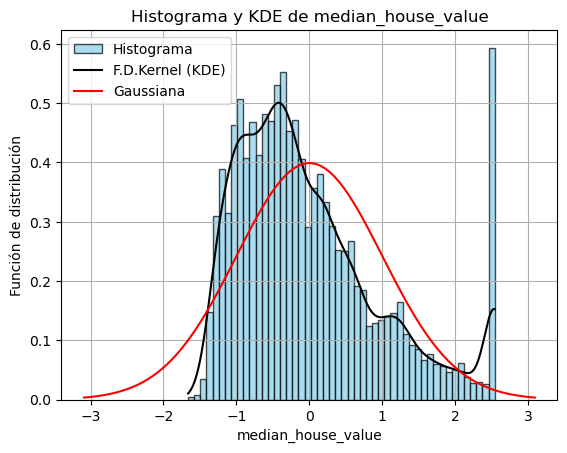

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [42]:
# Crear la función de densidad kernel (KDE)
edades_edificios = df_z

kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='black', label='F.D.Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df_z), scale=np.std(df_z))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="Gaussiana")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

{'whiskers': [<matplotlib.lines.Line2D at 0x2cec1dfd070>,
 'caps': [<matplotlib.lines.Line2D at 0x2ce801b6cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ce80264b80>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec0276ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec03429a0>],
 'means': []}

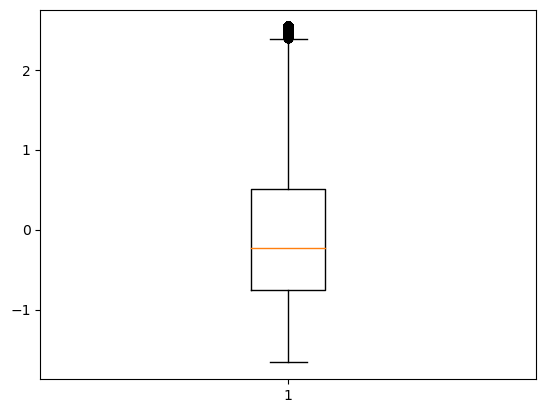

In [43]:
# Create a box plot
plt.boxplot(df_z)

In [44]:
df_z

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

In [50]:
# Calculate the percentiles
Q75 = np.quantile(df_z, 0.75)
Q25 = np.quantile(df_z, 0.25)

# Obtain IQR
IQR = Q75 - Q25

# Upper and lower thresholds
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)

print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df_z < lim_inf) | (df_z > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

IQR:  1.2576605675444195 
Q75:  0.5014972585678981 
Q25:  -0.7561633089765214 
lim_inf:  -2.6426541602931506 
lim_sup:  2.3879881098845273
Number of outliers: 1071


sklearn.preprocessing -> MUY IMPORTANTE, SE UTILIZA MUCHO

El escalador sklearn.preprocessing.RobustScaler aplica un escalado a las características de forma que sea más robusto a los valores atípicos o outliers.

En concreto, RobustScaler realiza dos pasos principales:

Calcula la mediana y el rango intercuartil (IQR) de cada característica en el conjunto de datos 
(el IQR es la diferencia entre el percentil 75 y el percentil 25 de los datos). La mediana y el IQR son 
medidas resistentes a los valores atípicos, lo que significa que no se ven afectados por posibles valores 
extremos que puedan existir en los datos.

Utiliza la mediana y el IQR de cada característica para escalar los datos. En particular, RobustScaler transforma
cada valor de la característica restando la mediana de la característica y dividiendo por el IQR de la característica.

No transforma la distribucón en una estándar

In [46]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
transformed_df = scaler.fit_transform(df[['median_house_value']])
transformed_df = pd.DataFrame(transformed_df, columns=['median_house_value_scaled'])
df_rob = transformed_df['median_house_value_scaled']
print('Mean:', df_rob.mean(), 'Standard Deviation:', df_rob.std())

Mean: 0.1871201854188749 Standard Deviation: 0.7951463626143942


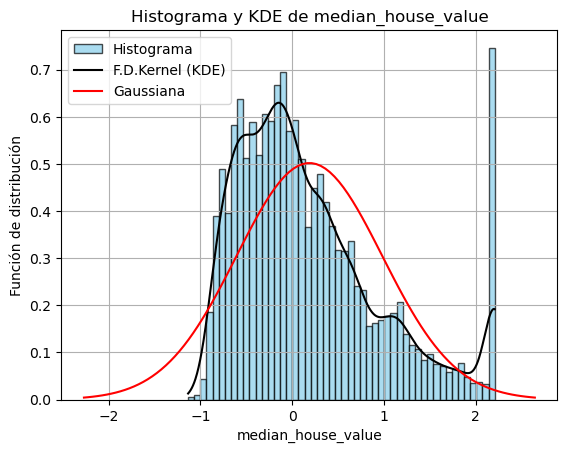

Área del histograma =  1.0 , luego verifica que es una funcion de densidad


In [47]:
# Crear la función de densidad kernel (KDE)
edades_edificios = df_rob

kde = gaussian_kde(edades_edificios)

# La KDE suaviza el histograma de los datos, proporcionando una estimación continua 
# de la función de densidad de probabilidad. La suavidad de la KDE está controlada 
# por un parámetro de ancho de banda, que determina cuánto se suavizan los datos. 
# Un ancho de banda más pequeño produce una estimación más detallada pero más ruidosa
# mientras que un ancho de banda más grande produce una estimación más suave pero menos detallada
# Basicamente hacer una interpolacion

# Calcular los puntos para graficar la función de densidad
x = np.linspace(min(edades_edificios), max(edades_edificios), 1000)
y = kde(x)

# Graficar el histograma y la función de densidad
hist, bins = np.histogram(edades_edificios, bins=10, density=True)
plt.hist(edades_edificios, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='black', label='F.D.Kernel (KDE)')
plt.title('Histograma y KDE de median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Función de distribución')

dist = norm(loc=np.mean(df_rob), scale=np.std(df_rob))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.plot(x, dist.pdf(x), "r-", label="Gaussiana")
plt.legend()

plt.legend()
plt.grid(True)
plt.show()

# Calcular el ancho de cada barra del histograma
widths = np.diff(bins)

# Calcular el área total del histograma
area_histograma = np.sum(hist * widths)

print("Área del histograma = ", area_histograma, ", luego verifica que es una funcion de densidad")

{'whiskers': [<matplotlib.lines.Line2D at 0x2cebf0da850>,
 'caps': [<matplotlib.lines.Line2D at 0x2cebf0da2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cebf0da880>],
 'medians': [<matplotlib.lines.Line2D at 0x2ce804dcee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ce804dcc10>],
 'means': []}

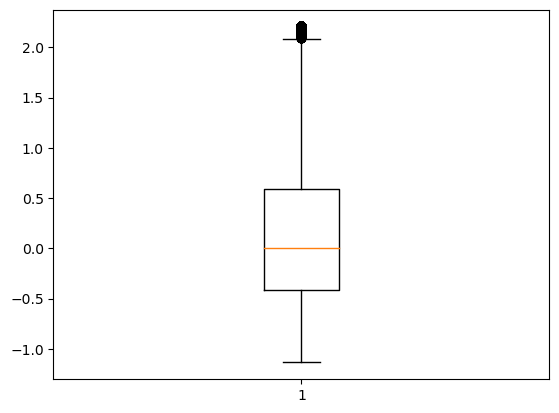

In [48]:
# Create a box plot
plt.boxplot(df_rob)

In [49]:
# Calculate the percentiles
Q75 = df_rob.quantile(0.75)
Q25 = df_rob.quantile(0.25)

# Obtain IQR
IQR = Q75 - Q25

# Upper and lower thresholds
lim_sup = Q75 + (1.5 * IQR)
lim_inf = Q25 - (1.5 * IQR)

print('IQR: ', IQR, '\nQ75: ', Q75, '\nQ25: ', Q25, '\nlim_inf: ', lim_inf, '\nlim_sup: ', lim_sup)

outliers = df[(df_rob < lim_inf) | (df_rob > lim_sup)]
print(f'Number of outliers: {len(outliers)}')

IQR:  1.0 
Q75:  0.5858742463393627 
Q25:  -0.41412575366063736 
lim_inf:  -1.9141257536606373 
lim_sup:  2.0858742463393627
Number of outliers: 1071
